In [27]:
path = "C:/Users/Yakina/.cache/kagglehub/datasets/adisongoh/it-service-ticket-classification-dataset/versions/1/all_tickets_processed_improved_v3.csv"
# os.listdir(path)

In [28]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud

In [29]:
data = pd.read_csv(path)
data

Document    Topic_group
0      connection with icon icon dear please setup ic...       Hardware
1      work experience user work experience user hi w...         Access
2      requesting for meeting requesting meeting hi p...       Hardware
3      reset passwords for external accounts re expir...         Access
4      mail verification warning hi has got attached ...  Miscellaneous
...                                                  ...            ...
47832  git space for a project issues with adding use...         Access
47833  error sent july error hi guys can you help out...  Miscellaneous
47834  connection issues sent tuesday july connection...       Hardware
47835  error cube reports sent tuesday july error hel...     HR Support
47836  running out on extensions hello please be advi...       Hardware

[47837 rows x 2 columns]

In [30]:
data['Topic_group'].value_counts()

Topic_group
Hardware                 13617
HR Support               10915
Access                    7125
Miscellaneous             7060
Storage                   2777
Purchase                  2464
Internal Project          2119
Administrative rights     1760
Name: count, dtype: int64

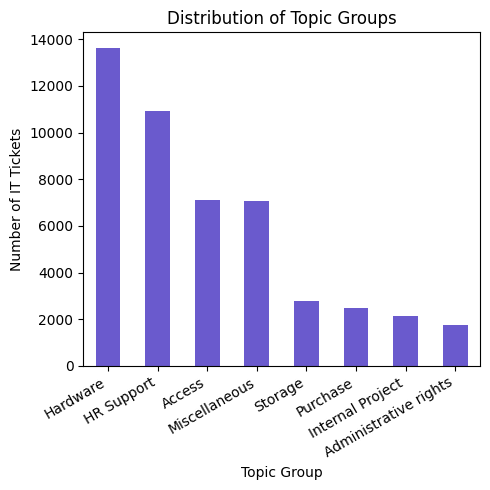

In [31]:
topic_count = data['Topic_group'].value_counts()

plt.figure(figsize=(5, 5))
topic_count.plot(kind='bar', color='slateblue')
plt.title('Distribution of Topic Groups')
plt.xlabel('Topic Group')
plt.ylabel('Number of IT Tickets')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

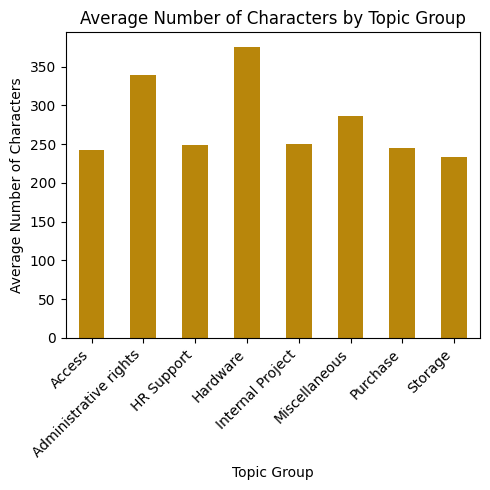

In [32]:
avg_chars_by_group = data.groupby('Topic_group')['Document'].apply(lambda x: x.str.len().mean())

plt.figure(figsize=(5, 5))
avg_chars_by_group.plot(kind='bar', color='darkgoldenrod')
plt.title('Average Number of Characters by Topic Group')
plt.xlabel('Topic Group')
plt.ylabel('Average Number of Characters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

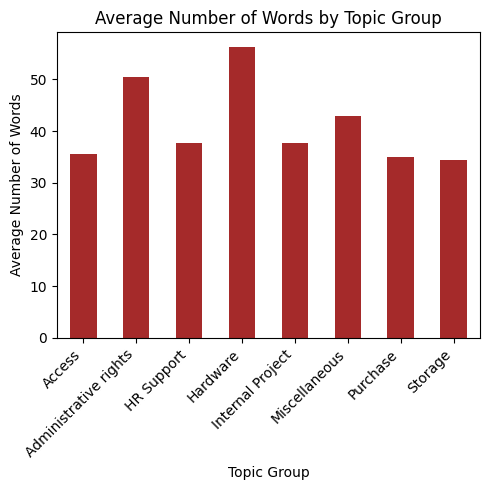

In [33]:
avg_words_by_group = data.groupby('Topic_group')['Document'].apply(lambda x: x.apply(lambda y: len(y.split())).mean())

plt.figure(figsize=(5, 5))
avg_words_by_group.plot(kind='bar', color='brown')
plt.title('Average Number of Words by Topic Group')
plt.xlabel('Topic Group')
plt.ylabel('Average Number of Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
all_words = ' '.join(data['Document']).split()

word_counts = Counter(all_words)
common_words = word_counts.most_common(20)  # Get the 20 most common words

print("Most common words for all tickets:")
for word, count in common_words:
    print(word, ":", count)

Most common words for all tickets:
please : 70212
pm : 28902
hi : 28498
regards : 27212
thank : 24962
for : 24456
hello : 23025
you : 21828
re : 21034
thanks : 19852
sent : 14717
kind : 13241
access : 13153
help : 11173
tuesday : 10896
with : 10555
wednesday : 10428
dear : 10320
thursday : 9935
can : 9526


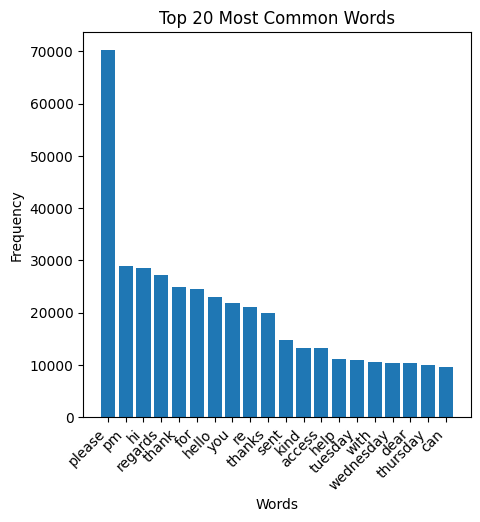

In [35]:
words, counts = zip(*common_words)
plt.figure(figsize=(5, 5))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

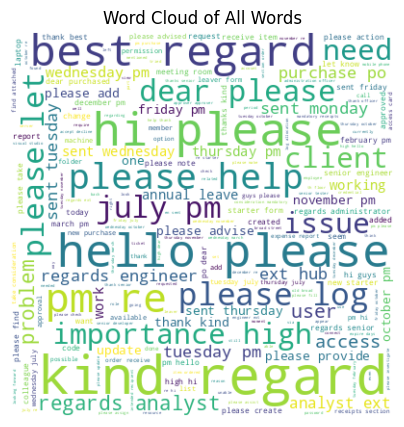

In [36]:
text = ' '.join(data['Document'])

wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Words')
plt.show()

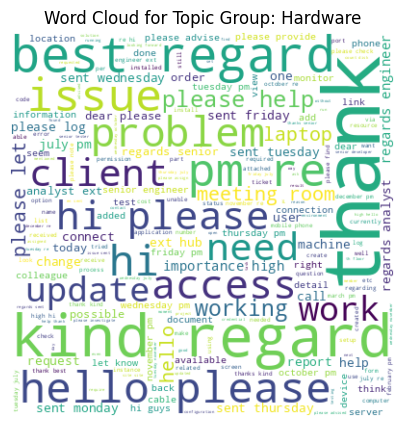

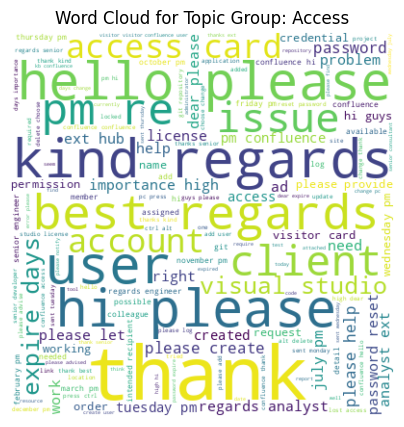

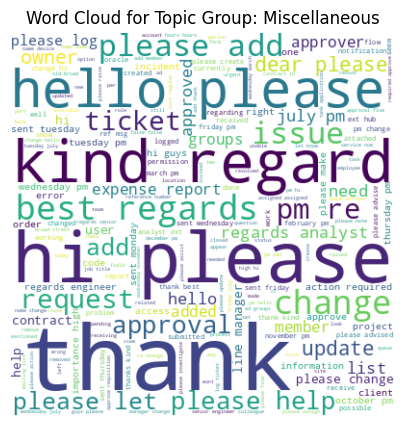

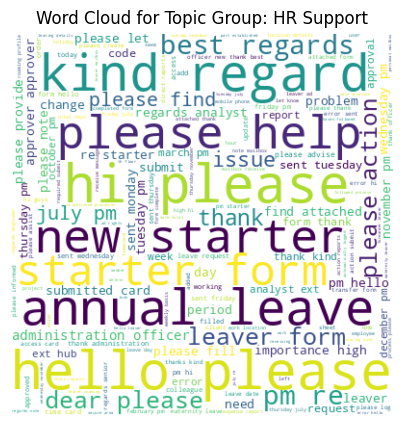

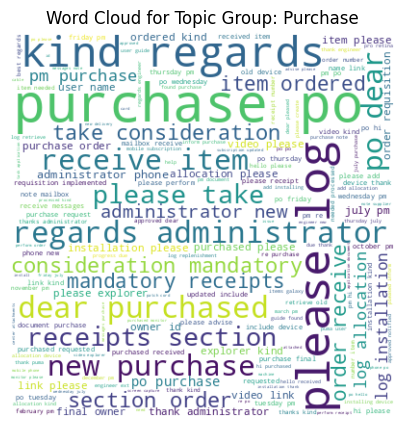

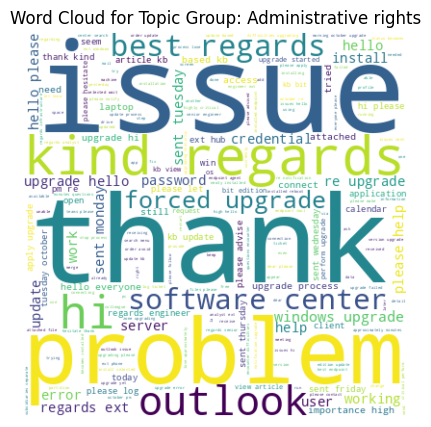

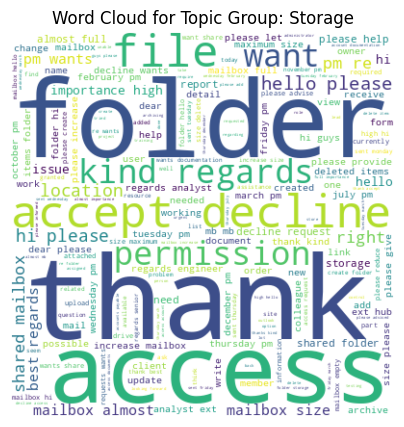

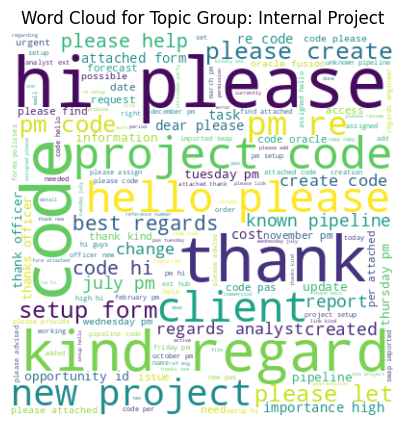

In [37]:
for group in data['Topic_group'].unique():
    text = ' '.join(data[data['Topic_group'] == group]['Document'])

    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic Group: {group}')
    plt.axis('off')
    plt.show()

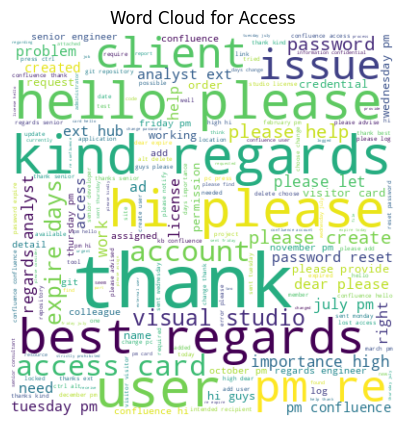

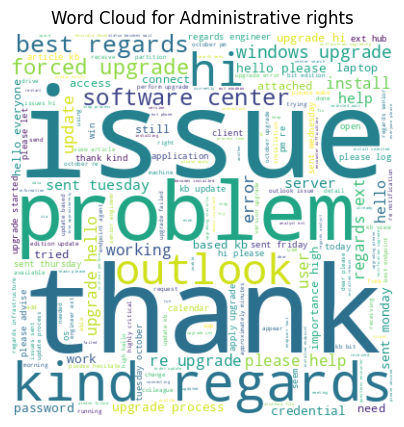

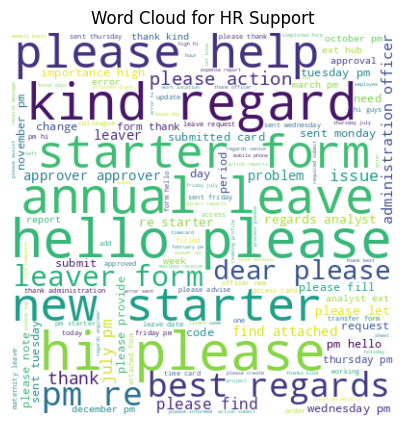

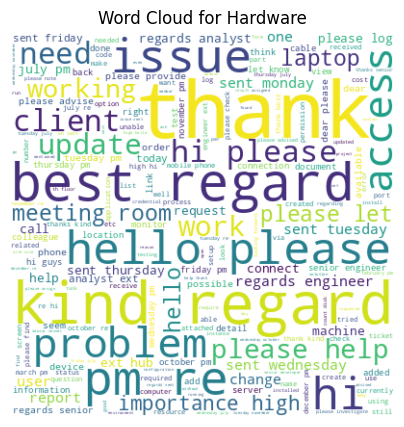

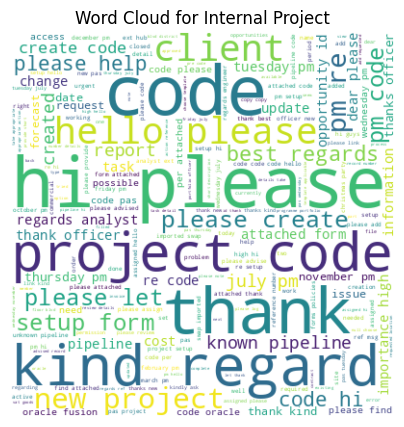

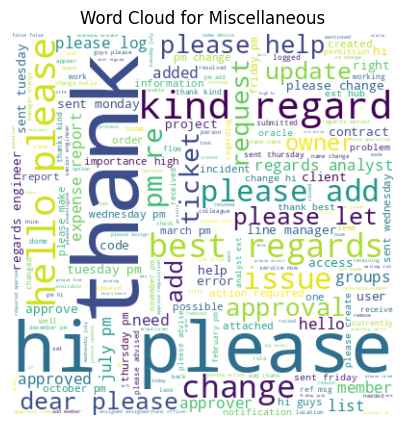

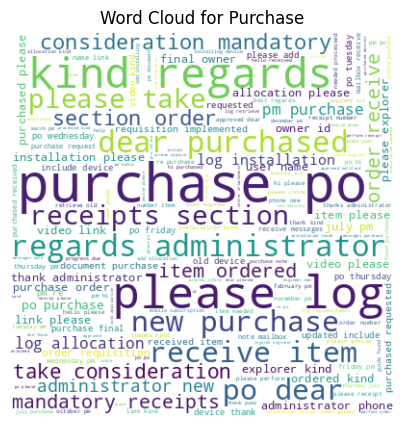

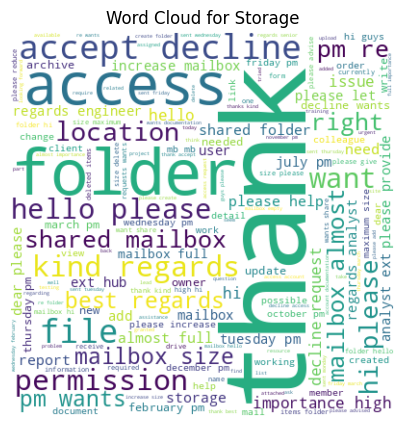

In [38]:
def generate_word_cloud(text, topic_name):
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {topic_name}')
    plt.axis('off')
    plt.show()

for topic_group, group_data in data.groupby('Topic_group'):
    documents = group_data['Document']

    tokenized_documents = ' '.join(documents).lower().split()
    filtered_documents = [word for word in tokenized_documents if word not in common_words]

    generate_word_cloud(' '.join(filtered_documents), topic_group)